In [17]:
from ppget.source import ModelSource
import matplotlib as mplt
mplt.rcParams["figure.figsize"] = (20,5)

start_date = "2007-07-01"
end_date = "2008-07-01"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: 10T, Name: Global_active_power, dtype: float64)

In [18]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.6812
2007-07-01 00:10:00    2.6502
2007-07-01 00:20:00    2.6266
2007-07-01 00:30:00    2.5242
2007-07-01 00:40:00    2.6000
Freq: 10T, Name: Global_active_power, dtype: float64

In [19]:
import pandas as pd
from sklearn.cluster import KMeans

kw_hour = pd.DataFrame(zip(list(series.values),list(series.index.hour)))
kw_hour.columns = ["kw", "hour"]
kmeans = KMeans(n_clusters=4).fit(kw_hour)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.257419    8.5       ]
 [ 1.13217081 14.49962046]
 [ 1.62124839 20.49946881]
 [ 0.47228017  2.5       ]]


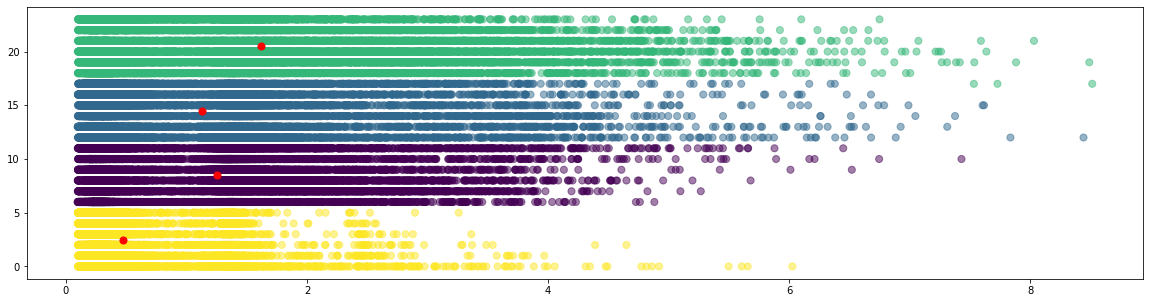

In [20]:
import matplotlib.pyplot as plt

plt.scatter(kw_hour["kw"], kw_hour["hour"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [21]:
kw_day = pd.DataFrame(zip(list(series.values),list(series.index.dayofweek)))
kw_day.columns = ["kw", "day_of_week"]
kmeans = KMeans(n_clusters=7).fit(kw_day)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.75647938 3.53826356]
 [0.72039328 0.        ]
 [3.30451389 5.23158803]
 [0.76661827 5.513939  ]
 [0.36403881 3.45142925]
 [0.69294636 1.52286117]
 [2.99230829 1.18219143]]


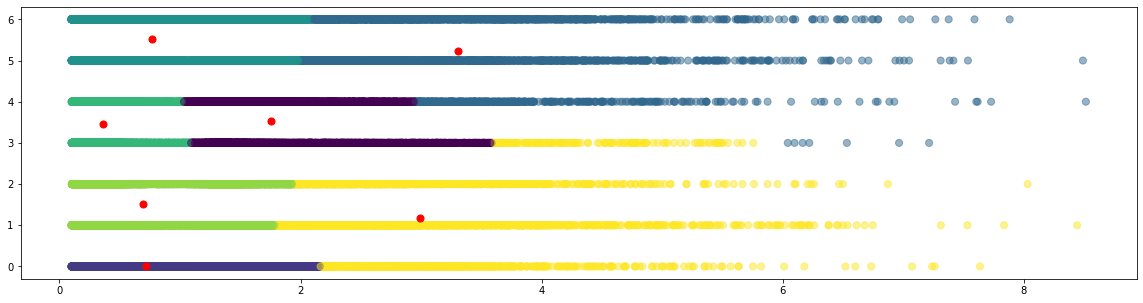

In [22]:
plt.scatter(kw_day["kw"], kw_day["day_of_week"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [23]:
kw_month = pd.DataFrame(zip(list(series.values),list(series.index.month)))
kw_month.columns = ["kw", "month"]
kmeans = KMeans(n_clusters=12).fit(kw_month)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.50912023  7.49217391]
 [ 0.86042071  1.49551505]
 [ 1.79689714 11.5535668 ]
 [ 0.526293    9.52251696]
 [ 2.12550958  5.69715698]
 [ 3.36678248  1.78937644]
 [ 1.86845624  3.49686073]
 [ 0.42589709  3.51578947]
 [ 0.50047931  5.47551503]
 [ 0.39836096 11.43849987]
 [ 2.33690999  9.15027111]
 [ 4.03511392 11.30239521]]


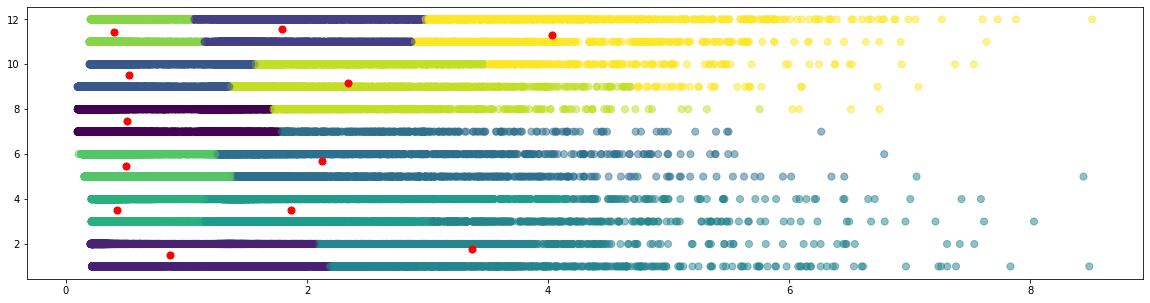

In [24]:
plt.scatter(kw_month["kw"], kw_month["month"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4).fit(kw_month)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.04397314  5.00030527]
 [ 0.76252682  7.97840848]
 [ 1.29905209  2.0003052 ]
 [ 1.37224007 10.97908575]]


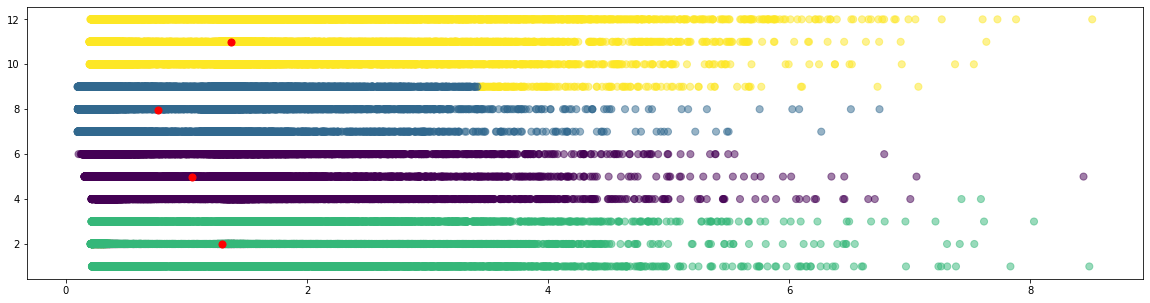

In [26]:
plt.scatter(kw_month["kw"], kw_month["month"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()